# Used libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_log_error
import numpy as np
from scipy.stats import randint
%matplotlib inline

# Data analysis

In [2]:
df = pd.read_csv('/home/marcin/Documents/Project Wojtek/Bike-Sharing-Dataset/hour.csv',
                      encoding = "ISO-8859-1", parse_dates=["dteday"])

## Data description

In [3]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Rented bikes per annum

In [4]:
year_2011 = df.loc[df['yr']==0].sum(axis=0)
year_2012 = df.loc[df['yr']==1].sum(axis=0)

/home/marcin/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,casual,registered,cnt
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


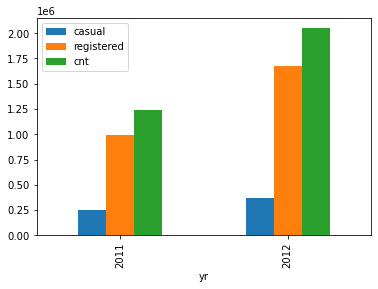

In [5]:
df_year = df.groupby(['yr'])['casual', 'registered', 'cnt'].sum()

df_year = df_year.rename(index={0: '2011', 1: '2012'})

df_year[['casual', 'registered', 'cnt']].plot(kind='bar')

df_year.head()

It is easy to notice increase in demand, what should be accounted for in the predicitve model for the future.

## Rented bikes per season

/home/marcin/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


casual  registered     cnt
yr   season                            
2011 spring   21425      128575  150000
     summer   77564      269752  347316
     fall     95450      324200  419650
     winter   52813      273324  326137
2012 spring   39197      282151  321348
     summer  125958      445315  571273
     fall    130641      510838  641479
     winter   76969      438507  515476

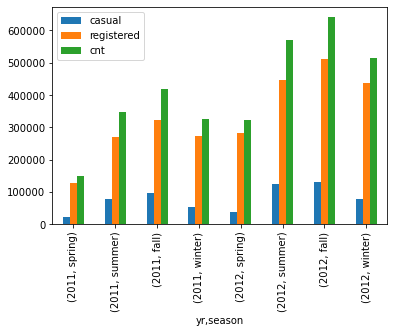

In [6]:
df_seasons = df.groupby(['yr', 'season'])['casual', 'registered', 'cnt'].sum()

df_seasons = df_seasons.rename(index={0: 2011, 1: 2012}, level=0)
df_seasons = df_seasons.rename(index={1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, level=1)


df_seasons[['casual', 'registered', 'cnt']].plot(kind='bar')

df_seasons

## Rented bikes count depending on weather condition

In [7]:
df_unnormalized = df.copy()
df_unnormalized['temp'] = df_unnormalized['temp'].apply(lambda x: x * 41)
df_unnormalized['atemp'] = df_unnormalized['atemp'].apply(lambda x: x * 50)
df_unnormalized['hum'] = df_unnormalized['hum'].apply(lambda x: x * 100)
df_unnormalized['windspeed'] = df_unnormalized['windspeed'].apply(lambda x: x * 67)

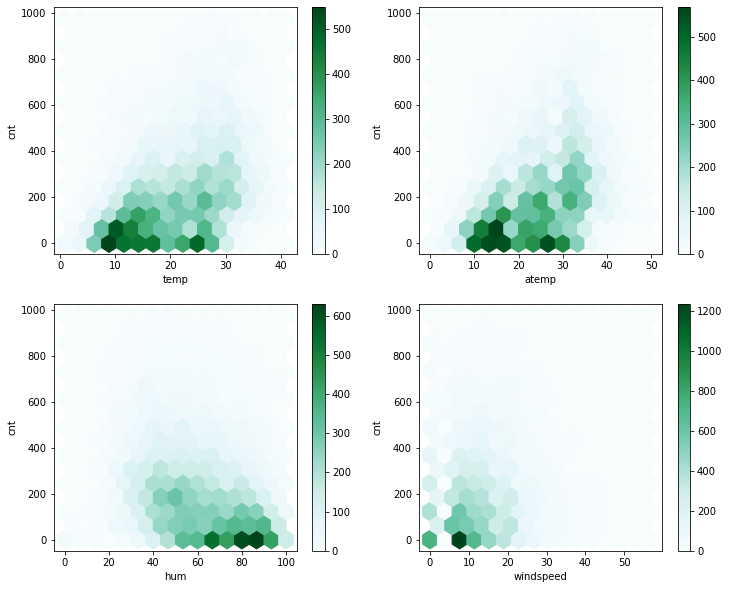

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

ax1 = df_unnormalized.plot.hexbin(x='temp', y='cnt', gridsize=15, sharex=False,
                                  ax=axes[0, 0])
ax2 = df_unnormalized.plot.hexbin(x='atemp', y='cnt', gridsize=15, sharex=False,
                                  ax=axes[0, 1])
ax3 = df_unnormalized.plot.hexbin(x='hum', y='cnt', gridsize=15, sharex=False,
                                  ax=axes[1, 0])
ax4 = df_unnormalized.plot.hexbin(x='windspeed', y='cnt', gridsize=15, sharex=False,
                                  ax=axes[1, 1])

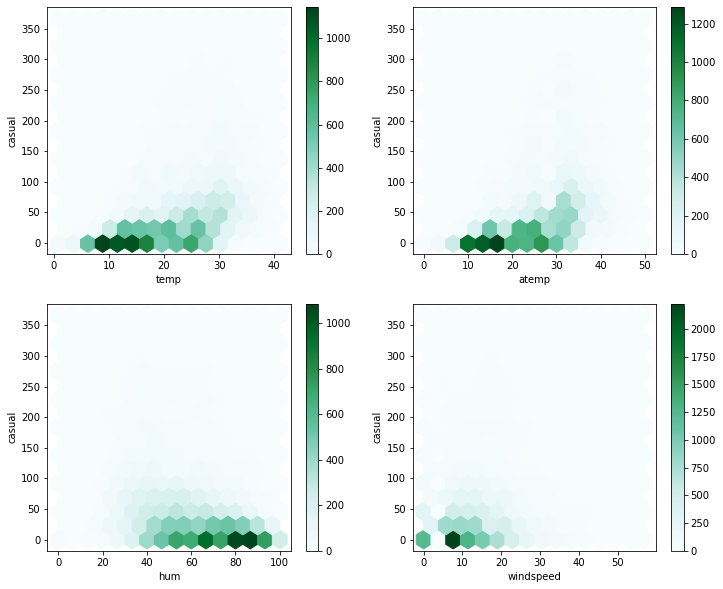

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

ax1 = df_unnormalized.plot.hexbin(x='temp', y='casual', gridsize=15, sharex=False,
                                  ax=axes[0, 0])
ax2 = df_unnormalized.plot.hexbin(x='atemp', y='casual', gridsize=15, sharex=False,
                                  ax=axes[0, 1])
ax3 = df_unnormalized.plot.hexbin(x='hum', y='casual', gridsize=15, sharex=False,
                                  ax=axes[1, 0])
ax4 = df_unnormalized.plot.hexbin(x='windspeed', y='casual', gridsize=15, sharex=False,
                                  ax=axes[1, 1])

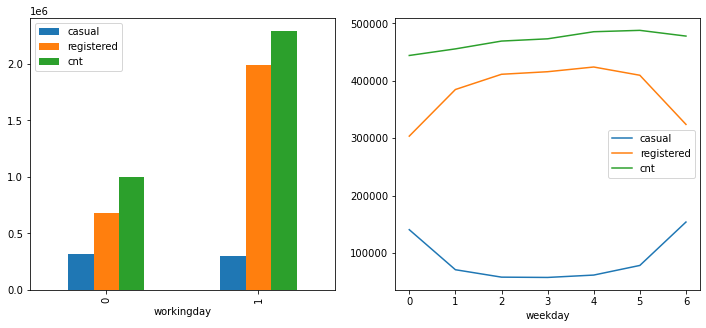

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1 = df.groupby(['workingday'])[['casual', 'registered', 'cnt']].apply(sum).plot.bar(
    ax=axes[0])
ax1 = df.groupby(['weekday'])[['casual', 'registered', 'cnt']].apply(sum).plot(
    ax=axes[1])

# Mitigating the influence of differences in demand over years

For mitigating the increase in demand, I will calculate 

We possibly can assume linear increase in demand. To be certain, it is advised to get more data from years predate the 2011. At least three points are required to determine linearinty or nonlinearity. 




In [11]:
df_seasons

casual  registered     cnt
yr   season                            
2011 spring   21425      128575  150000
     summer   77564      269752  347316
     fall     95450      324200  419650
     winter   52813      273324  326137
2012 spring   39197      282151  321348
     summer  125958      445315  571273
     fall    130641      510838  641479
     winter   76969      438507  515476

In [12]:
df_2013 = df.copy()

In [13]:
# df_2013.loc[(df_2013['season']==2) & (df_2013['yr']==1)]['cnt']

In [14]:
seasons = ['spring', 'summer', 'fall', 'winter']
i = 1

for season in seasons:

  rented_bikes_in_2012 = df_seasons.loc[2012, season]['cnt'] 
  rented_bikes_in_2011 = df_seasons.loc[2011, season]['cnt']

  ratio_season = rented_bikes_in_2012 / rented_bikes_in_2011
  print('Ratio', season, '=', ratio_season)

  df_2013.loc[(df_2013['season']==i) & (df_2013['yr']==1), 'cnt'] = round(df_2013['cnt'] * ratio_season)
  
  df_2013.loc[(df_2013['season']==i) & (df_2013['yr']==0), 'cnt'] = round(df_2013['cnt'] * (ratio_season ** 2))
  i += 1

Ratio spring = 2.14232
Ratio summer = 1.6448220064724919
Ratio fall = 1.5286047897057071
Ratio winter = 1.5805505048491892


In [15]:
# df_2013['dteday'] = df_2013['dteday'].dt.dayofyear

In [16]:
# df_2013.groupby(['dteday', 'hr']).head()

In [17]:
# df_2013

In [18]:
df_2013['yr'].replace([0, 1], 2)

0        2
1        2
2        2
3        2
4        2
        ..
17374    2
17375    2
17376    2
17377    2
17378    2
Name: yr, Length: 17379, dtype: int64

In [19]:
# df_seasons.cnt.to_numpy()

In [20]:
# df_2013.groupby(['season'])['cnt'].sum().divide(2).to_numpy()

In [21]:
seasons_years = 3*seasons
starting_year = 2011

for i in range(1, len(seasons_years) + 1):
  seasons_years[i - 1] = seasons_years[i - 1] + ' ' + str(starting_year)
  if i % 4 == 0:
    starting_year += 1

seasons_years

['spring 2011',
 'summer 2011',
 'fall 2011',
 'winter 2011',
 'spring 2012',
 'summer 2012',
 'fall 2012',
 'winter 2012',
 'spring 2013',
 'summer 2013',
 'fall 2013',
 'winter 2013']

Text(0.5, 1.0, 'Quantity of rented bicycles')

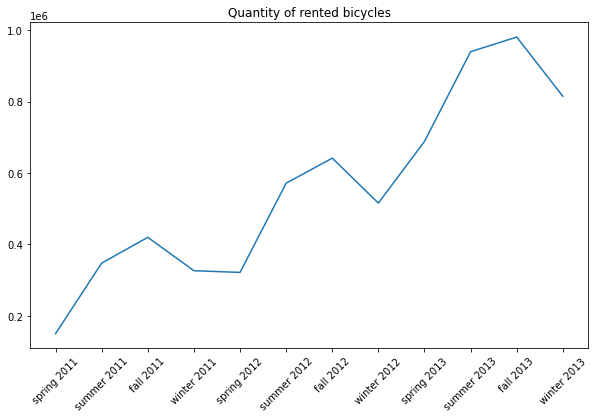

In [22]:
numpy_11_12 = df_seasons.cnt.to_numpy()
numpy_13 = df_2013.groupby(['season'])['cnt'].sum().divide(2).to_numpy()

concenated = np.concatenate((numpy_11_12, numpy_13))

plt.figure(figsize=(10, 6))
plt.plot(seasons_years, concenated)
plt.xticks(rotation = 45)
plt.title('Quantity of rented bicycles')

  With these changes, dataset for 2013 contains interpolated data twice as large as for previous years.
  
  Conluding, each hour of each day in 2013 now has two samples under different weather conditions and algorithm can benefit from it.

  Since algorithm won't use information what particular day of the year the sample is from, but only month/weekday/hour will matter, there is no problem with doubling samples. 

  Another approach would be calculating mean for each month/day/hour from those two years. 
 

# Funtion's declarations

In [23]:
def get_data_for_validation_curve(model, X_train, y_train, depths_range, cv=5):
    
    train_score, valid_score = validation_curve(model,
                                                 X_train, y_train,
                                                 param_name='max_depth',
                                                 param_range=depths_range,
                                                 cv=cv)
    return train_score, valid_score

In [24]:
def plot_validation_curve(range_depths, y_train, y_cvs, best_depth, title='Score', ):
    plt.figure(figsize=(12, 7))
    plt.plot(range_depths, y_train)
    plt.plot(range_depths, y_cvs)
    plt.plot(best_depth, y_cvs[best_depth - range_depths[0]], marker='o', color='black')
    plt.title(title)
    plt.xlabel('Depth')
    plt.ylabel('Score (max=1)')
    plt.legend(['Train', 'Cross-validation', 
                'Best score = {:.03f}'.format(y_cvs[best_depth - range_depths[0]])])
    plt.xticks(range_depths)
    plt.grid()
    plt.show()
    

In [25]:
def get_final_tree_and_score(tree_model, X_train, X_test, y_train, y_test):
    regressor_tree = tree_model
    regressor_tree.fit(X_train, y_train)
    final_score = regressor_tree.score(X_test, y_test)
    return regressor_tree, final_score
        

In [26]:
def get_bestDepth_scores_plot(trainScores, validScores, depth_range):
    train_scores_mean = []
    valid_scores_mean = []
    
    for i in range(len(depth_range)):
      train_scores_mean.append(np.mean(trainScores[i]))
      valid_scores_mean.append(np.mean(validScores[i]))

    best_depth = depth_range[0]

    for i in range(len(valid_scores_mean) - 1):
      if valid_scores_mean[i + 1] - valid_scores_mean[i] > 0.001:
        best_depth = depth_range[i + 1]
      else:
        break

    # best_depth = depth_range[np.argmax(valid_scores_mean)]
    
    plot_validation_curve(depth_range, train_scores_mean, valid_scores_mean, best_depth)
    
    return best_depth, train_scores_mean, valid_scores_mean

# Predicitve models

## Decision tree regressor with validation curve


In [27]:
X = df_2013[['mnth', 'hr', 'holiday', 
        'weekday', 'workingday', 'weathersit',
        'temp', 'atemp', 'hum', 'windspeed']]

y = df_2013[['cnt']]

depths = range(1, 25)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

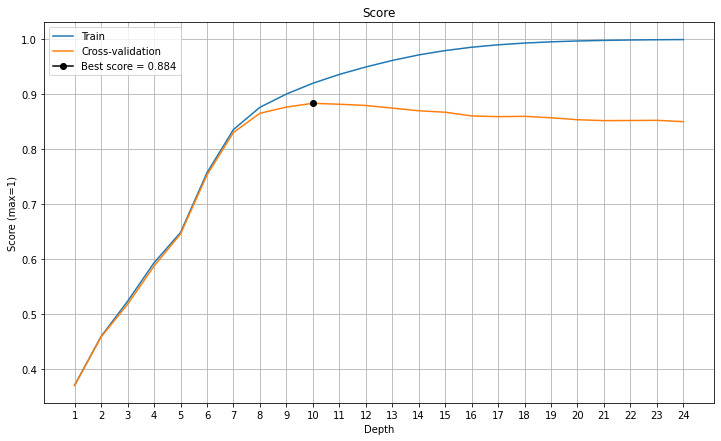


Best depth = 10
Train score = 0.920
Cross-validation score = 0.884

Test score = 0.860
msle = 0.17413270482556095


In [28]:
train_scores, valid_scores = get_data_for_validation_curve(DecisionTreeRegressor(),
                                                           X_train,
                                                           y_train,
                                                           depths)

best_depth, train_scores_mean, valid_scores_mean = get_bestDepth_scores_plot(train_scores,
                                                                          valid_scores,
                                                                          depths)


print("""
Best depth = {}
Train score = {:.3f}
Cross-validation score = {:.3f}
""".format(best_depth, train_scores_mean[best_depth - 1],
valid_scores_mean[best_depth - 1]))


regressor_tree, test_score = get_final_tree_and_score(
                                DecisionTreeRegressor(max_depth=best_depth), 
                                X_train, X_test, y_train, y_test)

print("Test score = {:.3f}".format(test_score))

test_predictions = regressor_tree.predict(X_test)

test_msle = mean_squared_log_error(y_test, test_predictions)
print('msle =', test_msle)

## Random forest regresson with hyperparameter tunning

In [29]:
clf_randomForest = RandomForestRegressor()

y_train_numpy = y_train.to_numpy()
y_train_numpy = np.ravel(y_train_numpy)

y_test_numpy = y_test.to_numpy()
y_test_numpy = np.ravel(y_test_numpy)

param_dist = {
    "n_estimators": range(50, 201, 15),
    "max_depth": range(10, 21, 2),
    "max_features": ['auto', 'sqrt', 'log2'],
    "min_samples_split": [2, 3, 5, 8, 10, 13],
    }


In [30]:
# gs = GridSearchCV(estimator=clf_randomForest, param_grid=param_dist, verbose=2, cv=5)

# gs.fit(X_train, y_train_numpy)

# best_params_forest = gs.best_params_

# best_params_forest

In [31]:
regressor_tree, test_score = get_final_tree_and_score(RandomForestRegressor(max_depth=16,
                                                                            max_features='auto',
                                                                            min_samples_split=4,
                                                                            n_estimators=90),  
                                                      X_train, X_test,
                                                      y_train_numpy, y_test_numpy)

print("r2_score [test set] = {:.3f}".format(test_score))

r2_score [test set] = 0.920


In [32]:
test_predictions_forest = regressor_tree.predict(X_test)

msle_best_forest = mean_squared_log_error(y_test, test_predictions_forest)

print('msle =', msle_best_forest)

msle = 0.13545616611523903


## Random forest regressor with validation curve

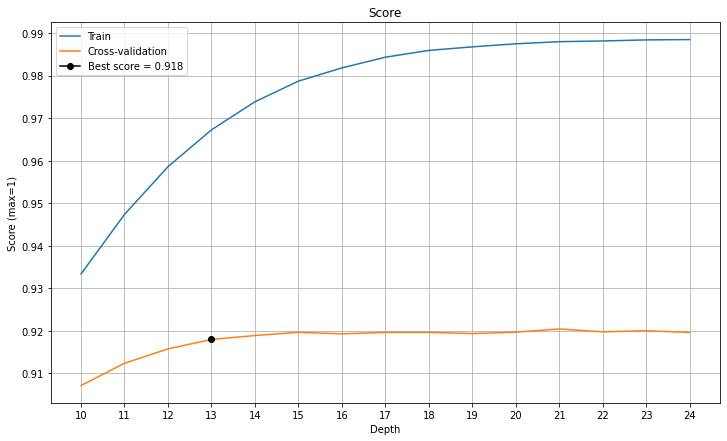


Recommended depth = 13
Train score = 0.967
Cross-validation score = 0.918

Test score = 0.919


In [33]:
depths = range(10, 25)

train_scores_forest, valid_scores_forest = get_data_for_validation_curve(clf_randomForest,
                                                           X_train,
                                                           y_train_numpy,
                                                           depths)

best_depth, train_scores_mean_forest, valid_scores_mean_forest = get_bestDepth_scores_plot(
                                                                      train_scores_forest, 
                                                                      valid_scores_forest,
                                                                      depths
                                                                      )


print("""
Recommended depth = {}
Train score = {:.3f}
Cross-validation score = {:.3f}
""".format(best_depth, train_scores_mean_forest[best_depth - depths[0]],
valid_scores_mean_forest[best_depth - depths[0]]))


regressor_tree, test_score = get_final_tree_and_score(
    RandomForestRegressor(), X_train, X_test, y_train_numpy, y_test_numpy)

print("Test score = {:.3f}".format(test_score))

test_predictions = regressor_tree.predict(X_test)

## Neural Network

In [34]:
X_primary = df[['yr', 'season', 'mnth', 'hr', 'holiday', 
        'weekday', 'workingday', 'weathersit',
        'temp', 'atemp', 'hum', 'windspeed']]

y_primary = df[['cnt']]

depths = range(1, 25)

X_train_primary, X_test_primary, y_train_primary, y_test_primary = train_test_split(
    X, y, test_size=0.2,
    random_state=42
  )

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

In [36]:
def build_model(input_shape):
    model = tf.keras.models.Sequential([
        Dense(256, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dense(256, activation='relu'),
        # BatchNormalization(),
        # Dense(128, activation='relu'),
        Dense(1, activation='relu')
        ])
    model.compile(optimizer=RMSprop(learning_rate=5*10e-4), loss='msle', metrics=['msle'])
    return model

In [37]:
input_shape = (X_train.shape[1],)

model = build_model(input_shape)

In [38]:
history = model.fit(X_train_primary, y_train_primary, batch_size=16, epochs=25)

Epoch 1/25
869/869 [==============================] - 2s 2ms/step - loss: 0.8628 - msle: 0.8628
Epoch 2/25
869/869 [==============================] - 2s 2ms/step - loss: 0.4640 - msle: 0.4640
Epoch 3/25
869/869 [==============================] - 2s 2ms/step - loss: 0.3879 - msle: 0.3879
Epoch 4/25
869/869 [==============================] - 2s 2ms/step - loss: 0.3515 - msle: 0.3515
Epoch 5/25
869/869 [==============================] - 2s 2ms/step - loss: 0.3297 - msle: 0.3297
Epoch 6/25
869/869 [==============================] - 2s 2ms/step - loss: 0.3072 - msle: 0.3072
Epoch 7/25
869/869 [==============================] - 2s 2ms/step - loss: 0.2880 - msle: 0.2880
Epoch 8/25
869/869 [==============================] - 2s 2ms/step - loss: 0.2700 - msle: 0.2700
Epoch 9/25
869/869 [==============================] - 2s 2ms/step - loss: 0.2676 - msle: 0.2676
Epoch 10/25
869/869 [==============================] - 2s 2ms/step - loss: 0.2554 - msle: 0.2554
Epoch 11/25
869/869 [==================

In [39]:
val_msle = model.evaluate(X_test_primary, y_test_primary, verbose=0)
print("MSLE = {:.03}".format(val_msle[1]))

MSLE = 0.178


In [40]:
y_predicted = model.predict(X_test_primary)
y_predicted.min()

0.0

In [41]:
r2 = r2_score(y_test_primary, y_predicted)
print('r2 score =', r2)

r2 score = 0.796826685413966
